# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.structures import CaseInsensitiveDict
import datetime
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [109]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [110]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = query_url + city
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        
    # Add 1 to the record count
    record_count += 1
   
    # Run an API request for each of the cities
    try:
                # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | along
Processing Record 4 of Set 1 | rawson
Processing Record 5 of Set 1 | cable beach
City not found. Skipping...
'coord'
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | northam
Processing Record 9 of Set 1 | mao
Processing Record 10 of Set 1 | machali
Processing Record 11 of Set 1 | puerto san jose
Processing Record 12 of Set 1 | sinabang
Processing Record 13 of Set 1 | mitsamiouli
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | mount pearl
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | la passe
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | is

Processing Record 35 of Set 4 | longyearbyen
Processing Record 36 of Set 4 | enewetak
Processing Record 37 of Set 4 | stanley
Processing Record 38 of Set 4 | umea
Processing Record 39 of Set 4 | bahia honda
Processing Record 40 of Set 4 | minbu
Processing Record 41 of Set 4 | ullal
Processing Record 42 of Set 4 | gubkinskiy
Processing Record 43 of Set 4 | chui
Processing Record 44 of Set 4 | kurumkan
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | semikarakorsk
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | consolacion del sur
Processing Record 49 of Set 4 | isangel
Processing Record 0 of Set 5 | okhotsk
Processing Record 1 of Set 5 | brownwood
Processing Record 2 of Set 5 | sao felix do xingu
Processing Record 3 of Set 5 | kingscliff
Processing Record 4 of Set 5 | san antonio de pale
Processing Record 5 of Set 5 | arar
Processing Record 6 of Set 5 | suizhou
Processing Record 7 of Set 5 | timbuktu
Processing Record 8 of Set 5 | wenchang


Processing Record 31 of Set 8 | mokolo
Processing Record 32 of Set 8 | kone
Processing Record 33 of Set 8 | itoman
Processing Record 34 of Set 8 | carnarvon
Processing Record 35 of Set 8 | hameenlinna
Processing Record 36 of Set 8 | minas de marcona
Processing Record 37 of Set 8 | south hedland
Processing Record 38 of Set 8 | santa terezinha
Processing Record 39 of Set 8 | privolzhskiy
Processing Record 40 of Set 8 | khanty-mansiysk
Processing Record 41 of Set 8 | murashi
Processing Record 42 of Set 8 | conceicao da barra
Processing Record 43 of Set 8 | callao
Processing Record 44 of Set 8 | togur
Processing Record 45 of Set 8 | mugia
Processing Record 46 of Set 8 | taoudenni
Processing Record 47 of Set 8 | anna regina
Processing Record 48 of Set 8 | imperatriz
Processing Record 49 of Set 8 | petropavlovsk-kamchatsky
Processing Record 0 of Set 9 | tralee
Processing Record 1 of Set 9 | gisborne
Processing Record 2 of Set 9 | ketchikan
Processing Record 3 of Set 9 | la'ie
Processing Reco

Processing Record 16 of Set 12 | warman
Processing Record 17 of Set 12 | vel'sk
Processing Record 18 of Set 12 | brisas de zicatela
Processing Record 19 of Set 12 | kabalo
Processing Record 20 of Set 12 | tuy hoa
Processing Record 21 of Set 12 | mabaruma
Processing Record 22 of Set 12 | rapla
Processing Record 23 of Set 12 | isiro
Processing Record 24 of Set 12 | praia da vitoria
Processing Record 25 of Set 12 | nhandeara
Processing Record 26 of Set 12 | goure
Processing Record 27 of Set 12 | rio grande
Processing Record 28 of Set 12 | kralendijk
Processing Record 29 of Set 12 | grand falls-windsor
Processing Record 30 of Set 12 | igra
Processing Record 31 of Set 12 | zhanaozen
Processing Record 32 of Set 12 | tonghae
Processing Record 33 of Set 12 | el hajeb
Processing Record 34 of Set 12 | saudarkrokur
Processing Record 35 of Set 12 | kattivakkam
Processing Record 36 of Set 12 | nuku'alofa
Processing Record 37 of Set 12 | nguigmi
Processing Record 38 of Set 12 | phultala
Processing R

In [113]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [114]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,10.25,50,75,10.29,CL,1699466568
1,papatowai,-46.5619,169.4708,8.70,88,100,3.62,NZ,1699466612
2,along,28.1667,94.7667,14.38,75,13,0.88,IN,1699466612
3,rawson,-43.3002,-65.1023,14.80,50,43,7.82,AR,1699466354
4,port mathurin,-19.6833,63.4167,24.99,77,100,5.21,MU,1699466613


In [115]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [116]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.25,50,75,10.29,CL,1699466568
1,papatowai,-46.5619,169.4708,8.70,88,100,3.62,NZ,1699466612
2,along,28.1667,94.7667,14.38,75,13,0.88,IN,1699466612
3,rawson,-43.3002,-65.1023,14.80,50,43,7.82,AR,1699466354
4,port mathurin,-19.6833,63.4167,24.99,77,100,5.21,MU,1699466613


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

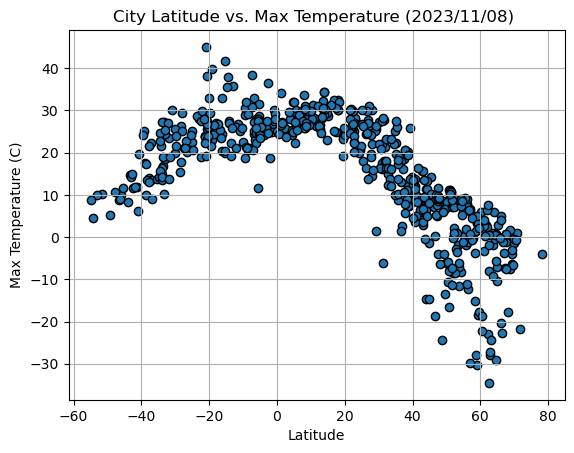

In [117]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolor="black", marker ="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s) " % time.strftime("%Y/%m/%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

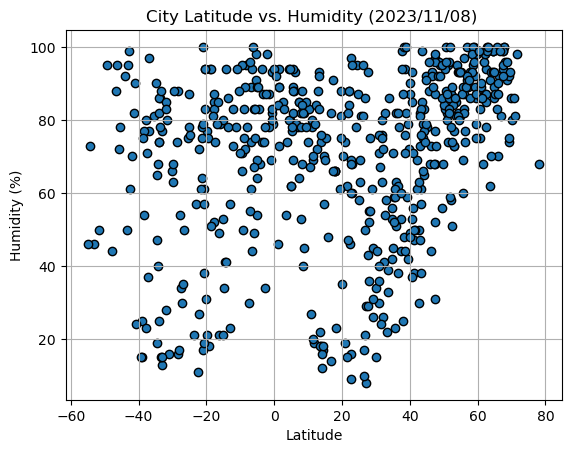

In [118]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolor="black", marker ="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s) " % time.strftime("%Y/%m/%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

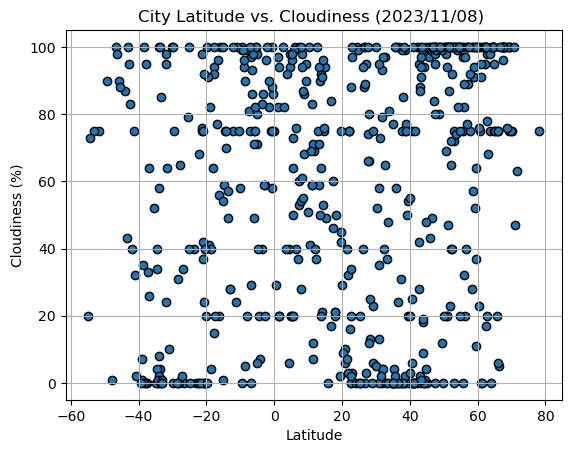

In [119]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolor="black", marker ="o",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s) " % time.strftime("%Y/%m/%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

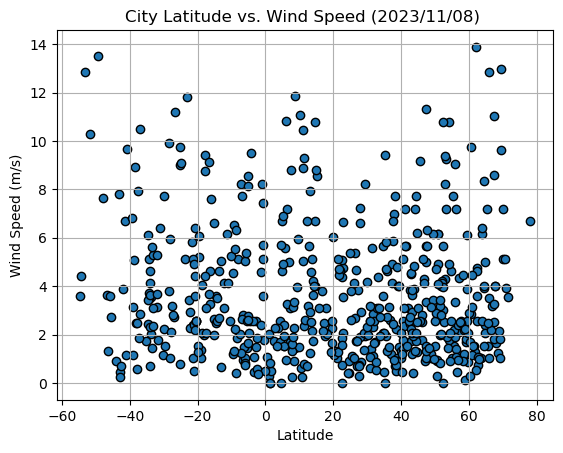

In [120]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolor="black", marker ="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s) " % time.strftime("%Y/%m/%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [121]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, eq_loc):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
       
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, eq_loc, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [122]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,along,28.1667,94.7667,14.38,75,13,0.88,IN,1699466612
5,bilibino,68.0546,166.4372,-17.86,96,100,1.64,RU,1699466613
6,northam,51.0333,-4.2167,9.58,83,100,4.93,GB,1699466614
7,mao,39.8885,4.2658,14.31,72,0,1.03,ES,1699466614
9,puerto san jose,13.9256,-90.8244,29.19,74,92,1.73,GT,1699466614


In [123]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.25,50,75,10.29,CL,1699466568
1,papatowai,-46.5619,169.4708,8.70,88,100,3.62,NZ,1699466612
3,rawson,-43.3002,-65.1023,14.80,50,43,7.82,AR,1699466354
4,port mathurin,-19.6833,63.4167,24.99,77,100,5.21,MU,1699466613
8,machali,-34.1833,-70.6667,21.60,40,0,5.14,CL,1699466591


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7136585686016982


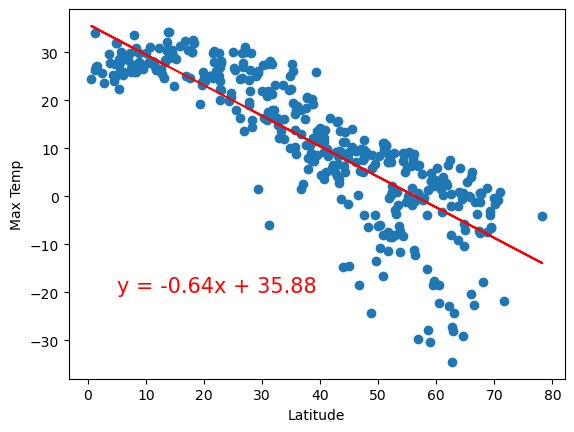

In [124]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"
eq_loc = (5,-20)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

The r-value is: 0.41976302599609333


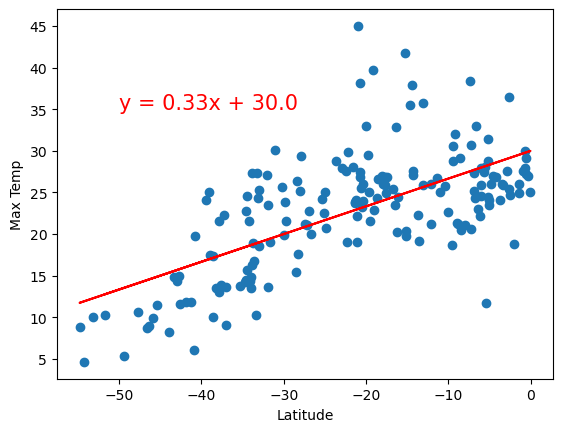

In [125]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"
eq_loc = (-50,35)
plot_linear_regression(x_values, y_values, y_label, eq_loc) 
plt.show()

**Discussion about the linear relationship:** The .41 r-value sugguests a moderate positive linear relationship between latitude and max temp for the southern hemisphere. The .71 r-value for the northern hemisphere has a stronger relationship between the latitude and max temp. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13512819321015374


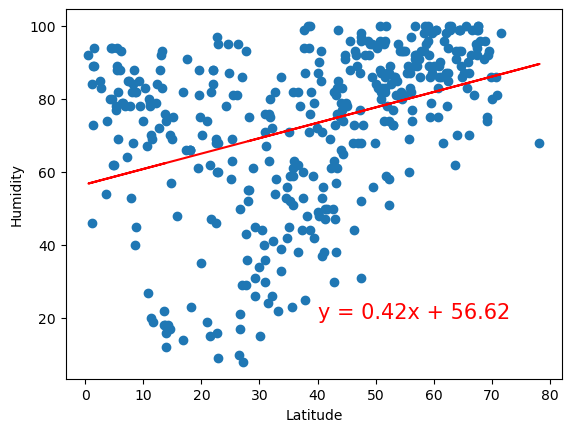

In [126]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
eq_loc = (40,20)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

The r-value is: 0.046269165788807076


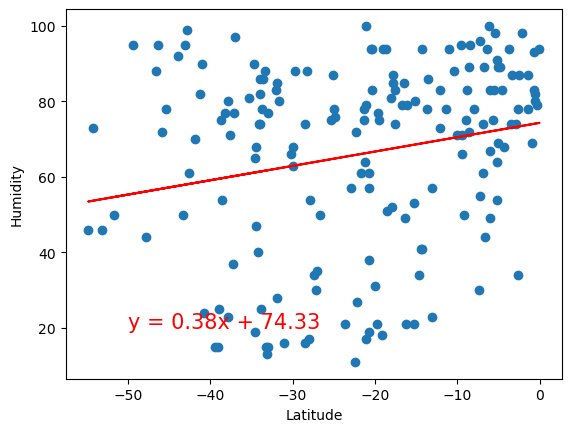

In [127]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
eq_loc = (-50,20)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

**Discussion about the linear relationship:** The r-value is .04 for southern hemisphere and for the northern hemisphere is .13. The relationship between latitude and humidity is still very week, but it is slightly better in the northern hemispher.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05116447798409225


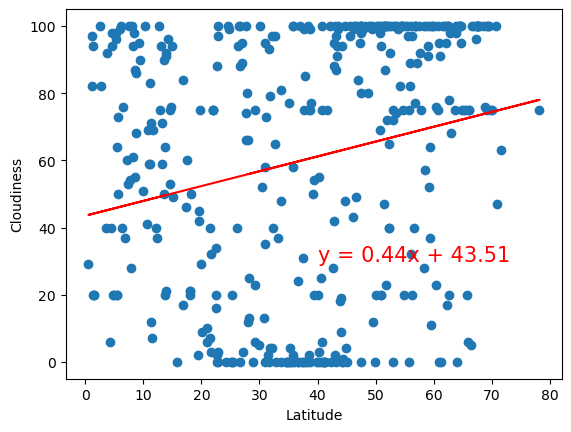

In [128]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
eq_loc = (40,30)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

The r-value is: 0.05553665552248903


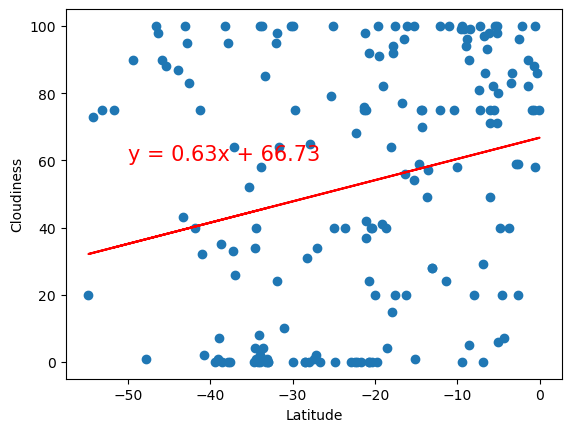

In [129]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
eq_loc = (-50,60)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

**Discussion about the linear relationship:** The r-value for the north hemispher is .05 and for the south hemispher is .05, this suggests that relationship between latitude and cloudiness is very week for both hemispher. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0026319803124563584


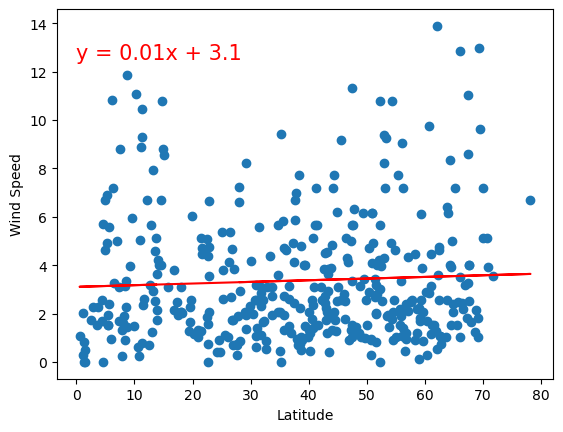

In [130]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
eq_loc = (0,12.5)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

The r-value is: 0.027976423430224415


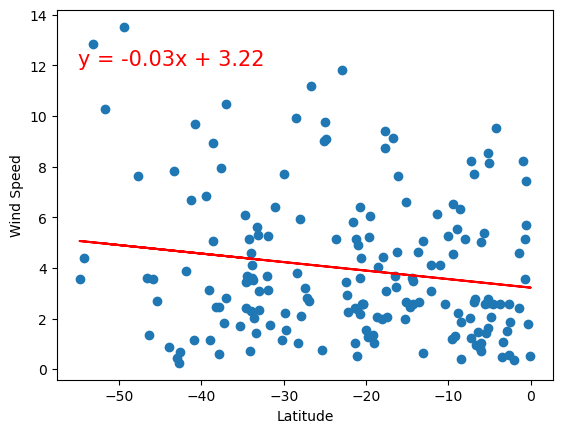

In [131]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
eq_loc = (-55,12)
plot_linear_regression(x_values, y_values, y_label, eq_loc)
plt.show()

**Discussion about the linear relationship:** The r-value for the southern hemispher is .02 and the r-value for the northern hemispher is .00, which suggests a weak relationship between wind speed and latitude. 